In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

%matplotlib inline
from IPython.display import display,HTML,display_html
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from IPython.display import display,HTML,display_html

In [ ]:
import pandas as pd
item_categories = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
sales_train = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")



In [ ]:
display(items.shape)
display(shops.shape)
display(sales_train.shape)
display(item_categories.shape)

In [ ]:
print(sales_train.head(3))
print(sales_train.isnull().sum())

In [ ]:
sales_train.describe()

In [ ]:
sales_train.head(10)

In [ ]:
sales_train = pd.merge(sales_train, items.drop('item_name', axis=1), on='item_id')
sales_train.head()

In [ ]:
#sales_train['date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')
#sales_train['month']=sales_train['date'].dt.month
#sales_train['year']=sales_train['year'].dt.year
#sales_train['date']=pd.to_datetime(sales_train['date'])
#sales_train[['Drop_Year','Drop_Month','Drop_day']]=sales_train['date'].apply(lambda x:pd.Series(x.strftime("%Y,%m,%d").split("-")))

#sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
#sales_train['month'] = sales_train['date'].dt.month
#sales_train['year'] = sales_train['date'].dt.year
#sales_train['day'] = sales_train['date'].dt.day
#sales_train['weekday'] = sales_train['date'].dt.weekday




sales_train['date'] = sales_train['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))
sales_train['year'] = sales_train['date'].apply(lambda x: x.year)
sales_train['month'] = sales_train['date'].apply(lambda x: x.month)
sales_train['day'] = sales_train['date'].apply(lambda x: x.day)




del sales_train['date']

display(sales_train.head(3))



In [ ]:
sales_train.hist(figsize=(40,20))

In [ ]:
sales_train['item_id'].unique()

In [ ]:
plt.figure(figsize=(20,20))
c_map= sales_train.corr()
sns.heatmap(c_map,cmap='BrBG',annot=True)
c_map

In [ ]:
#plt.plot(sales_train['year'], sales_train['item_price'])
#plt.xlabel('year')
#plt.ylabel('item_price')
#plt.show()
#fig,ax=plt.subplots(figsize=(20,6))
#sales_train['year'].plot(ax=ax)
#ax.set_title('Item_Price')
#ax.set_ylabel('item_price')
#ax.set_xlabel('month')
#ax.xaxis.set_ticks_position('bottom')
#fig.tight_layout();


#sales_train['month'].plot(figsize=(15, 6))
#plt.show()
#sales_train['year'].unique()
#sales_train.set_index('date',inplace=True)


sales_train['item_price'].plot(figsize=(45,10))
plt.show()


In [ ]:
sales_train['item_cnt_day'].plot(figsize=(25,10))
plt.show()

In [ ]:
#sales_train.drop(sales_train.index, inplace=True)
#sales_train.head(3)

In [ ]:
sales_train.plot.scatter(x='shop_id', y='item_price', figsize=(10,10))   #done

In [ ]:
sales_train.plot.scatter(x='month', y='item_price', figsize=(10,10))   #done

In [ ]:
sales_train.plot.scatter(x='year', y='item_price', figsize=(10,10))   #done

In [ ]:
ax = sns.scatterplot(x="day", y="item_price", data=sales_train)   #done


In [ ]:
sales_train.plot.scatter(x='month', y='item_price', figsize=(10,10))   #done

In [ ]:
sales_train.plot.scatter(x='item_id', y='item_cnt_day', figsize=(10,10))  #done

In [ ]:
sales_train['item_price'].plot.box(figsize=(10,8))  # done

In [ ]:
print(sales_train['item_cnt_day'].plot.box(figsize=(10,8)))   #done

In [ ]:
sales_train.describe()

> ****Data Cleaning******

In [ ]:
display(sales_train['item_price'].max())
display(sales_train['item_price'].min())
display(sales_train['item_price'].mean())
display(sales_train['item_cnt_day'].max())
display(sales_train['item_cnt_day'].min())
display(sales_train['item_cnt_day'].mean())


In [ ]:
sales_train[sales_train['item_price'] < 0]=sales_train['item_price'].mean()
sales_train[sales_train['item_cnt_day'] < 0]=sales_train['item_cnt_day'].mean()

print(sales_train['item_price'].min())
print(sales_train['item_cnt_day'].min())

In [ ]:
print(sales_train['item_price'].min())
print(sales_train.isnull().any())

In [ ]:
testing=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
testing.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(testing);

In [ ]:
#lower_bound=0.1
#upper_bound=0.95
#outlier_detection=sales_train['item_price'].quantile([lower_bound,upper_bound])

#print("Upper_bound and Lower_bound",outlier_detection)
#true_index=(outlier_detection.loc[lower_bound] < sales_train['item_price'].values),(sales_train['item_price'].values < outlier_detection.loc[upper_bound])



In [ ]:
#removing item_price outliers

Q1 = sales_train["item_price"].quantile(0.25)
Q3 = sales_train["item_price"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)
sales_train= sales_train[~((sales_train ["item_price"] < Lower_Fence) |(sales_train["item_price"] > Upper_Fence))]
print(sales_train['item_price'].max())

sales_train['item_cnt_day']=sales_train['item_cnt_day'].clip(0,20)
print(sales_train['item_cnt_day'].min())
print(sales_train['item_cnt_day'].max())



In [ ]:
sales_train.groupby(['item_id'])['item_price'].agg(["mean", "max", "min", "std", "count"])

In [ ]:
sales_train.drop_duplicates(keep=False,inplace=True)
print(sales_train['item_cnt_day'].min())
print(sales_train['item_cnt_day'].max())
#sales_train = sales_train.groupby(['shop_id', 'date_block_num', 'item_id', 'year', 'month'], as_index=False)['item_cnt_day'].sum().rename(columns={'item_cnt_day':'item_cnt_month'})


In [ ]:
sales_train.head(3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
X=sales_train.drop(['item_cnt_day','date_block_num','year','month','day'],axis=1)
Y=sales_train['item_cnt_day'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
print('Train rmse:',mean_squared_error(y_train, rf_train_pred))
print('Validation rmse:',(mean_squared_error(y_test, rf_test_pred)))

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
train_reg=reg.predict(X_train)
test_reg=reg.predict(X_test)
print('Train rmse:',mean_squared_error(y_train, train_reg))
print('Validation rmse:',mean_squared_error(y_test, test_reg))

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
print (model)
train_output=model.predict(X_train)
test_output=model.predict(X_test)
print(train_output)
print('Validation rmse:',mean_squared_error(y_test,test_output))


In [ ]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train) 
y_regre_train = regressor.predict(X_train) 
y_regre_test = regressor.predict(X_test)
print('Train rmse:',mean_squared_error(y_train,y_regre_train))
print('Validation rmse:',mean_squared_error(y_test,y_regre_test))


In [ ]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(testing.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(testing.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

In [ ]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(testing.values,freq=12,model="multiplicative")
fig = res.plot()
fig.show()


In [ ]:
# Additive model
res = sm.tsa.seasonal_decompose(testing.values,freq=12,model="additive")
fig = res.plot()


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(testing)

In [ ]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob


In [ ]:
ts.head(10)

In [ ]:
ts=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [ ]:
(ts==34.0).count()

In [66]:
import datetime as dt
from datetime import datetime
sales_train1 = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
sales_train1.date=sales_train1.date.apply(lambda x:dt.datetime.strptime(x, '%d.%m.%Y'))

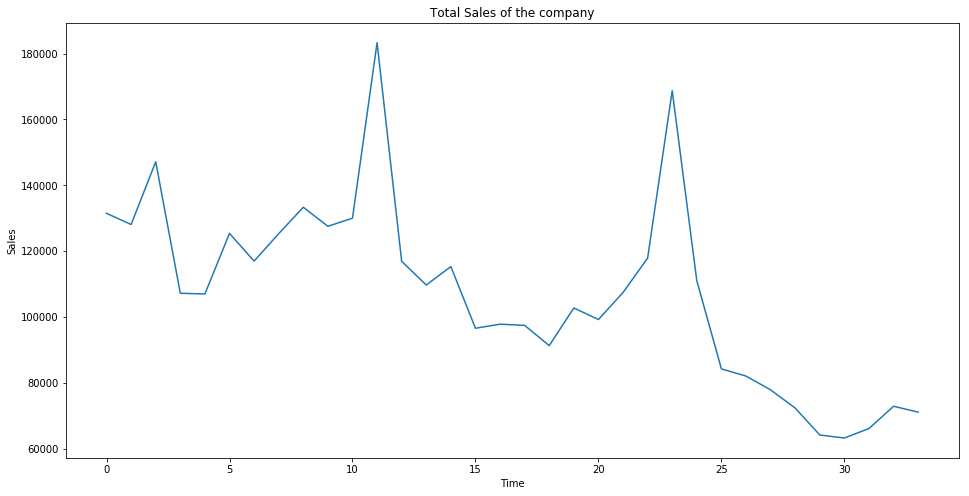

In [69]:
ts=sales_train1.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

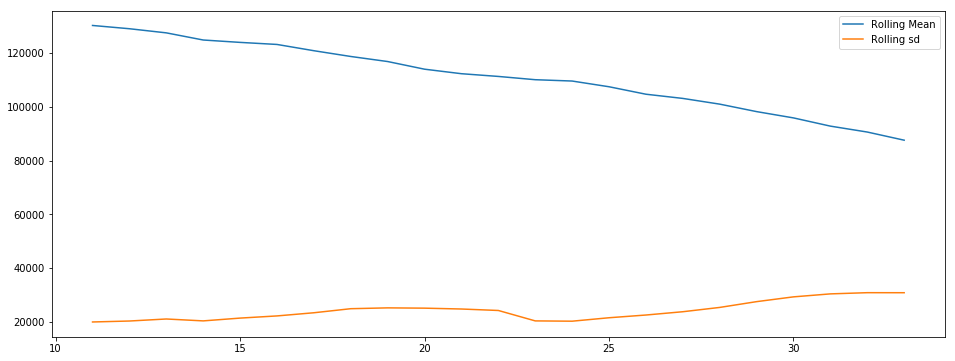

In [70]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

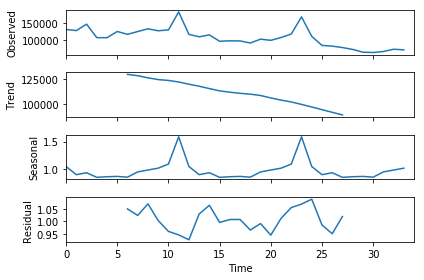

In [71]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

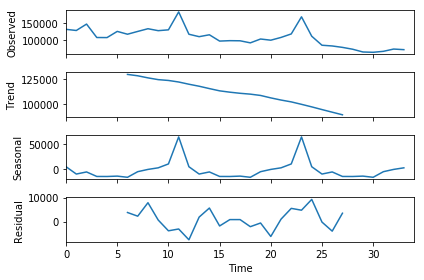

In [72]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [73]:
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [75]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob



[]

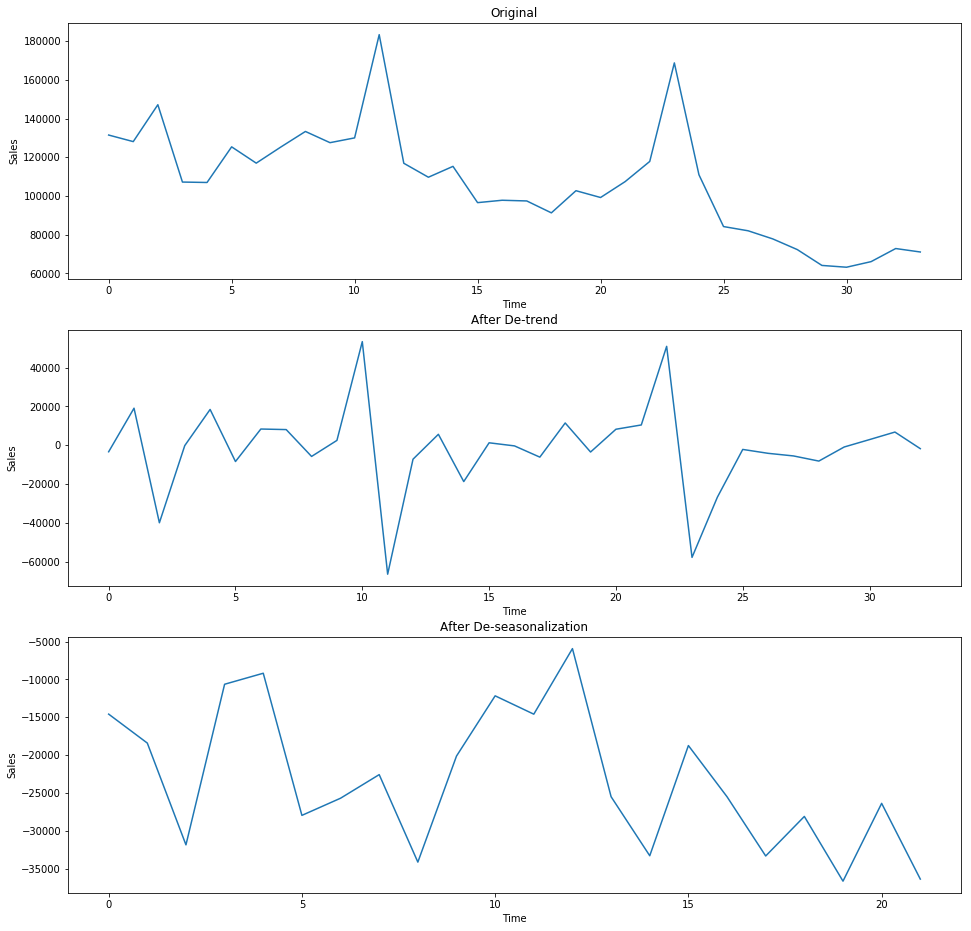

In [76]:
ts=sales_train1.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [84]:


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs



# now testing the stationarity again after de-seasonality
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [85]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh',title=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

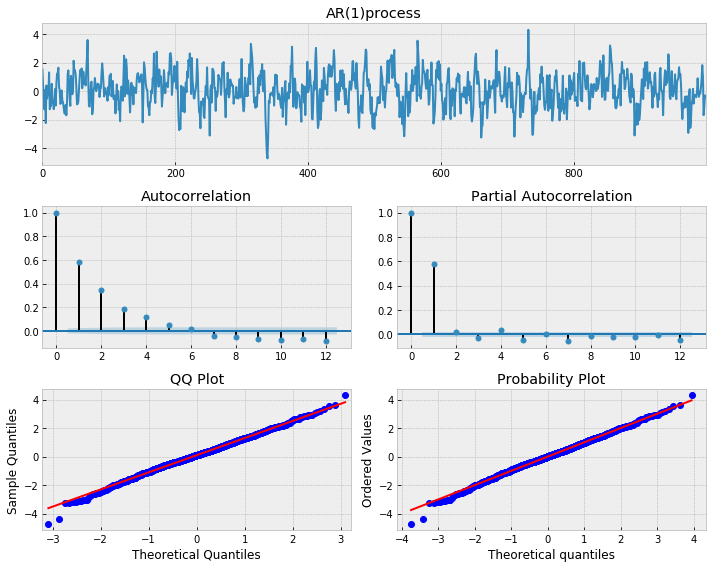

In [86]:
# Simulate an AR(1) process with alpha = 0.6
np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
limit=12    
_ = tsplot(x, lags=limit,title="AR(1)process")

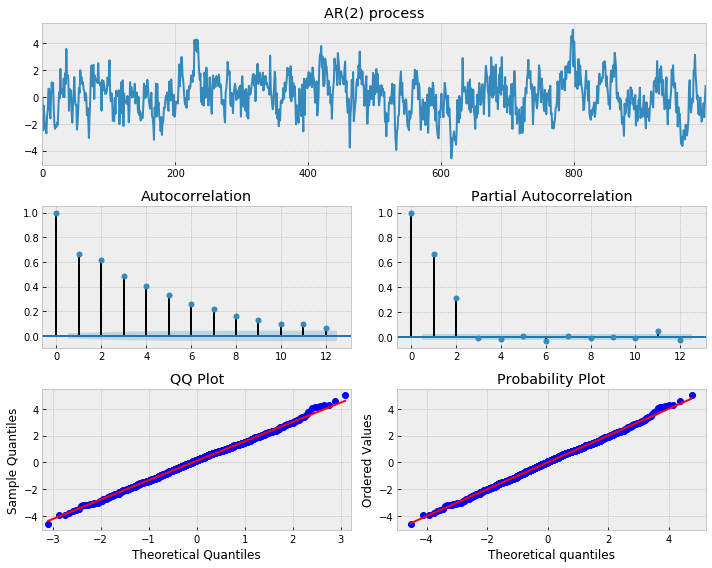

In [87]:
# Simulate an AR(2) process

n = int(1000)
alphas = np.array([.444, .333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=12,title="AR(2) process")

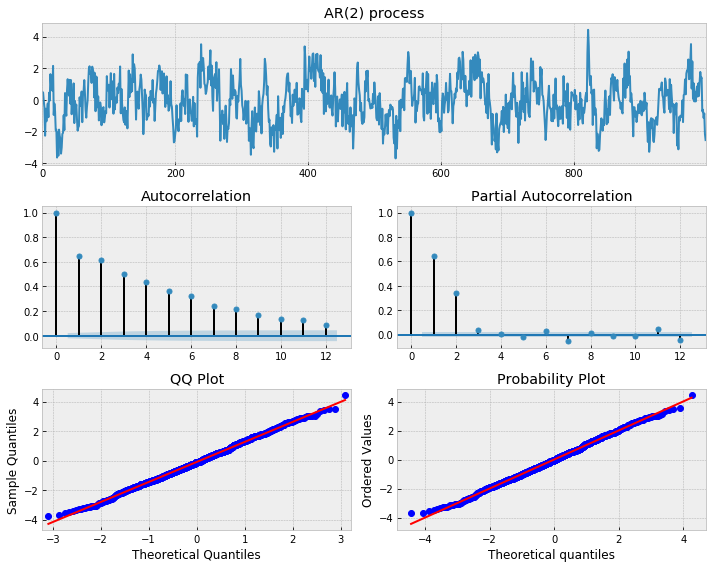

In [89]:
# Simulate an AR(2) process

n = int(1000)
alphas = np.array([.444, .333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=12,title="AR(2) process")

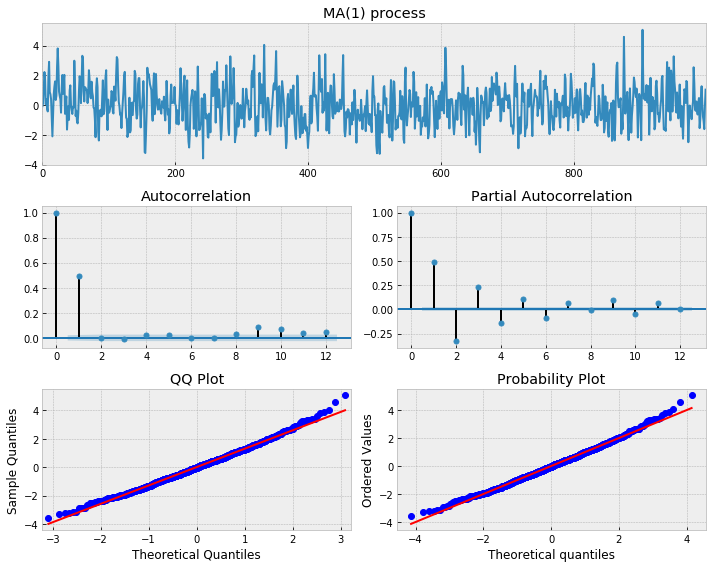

In [90]:
# Simulate an MA(1) process
n = int(1000)
# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.8])
# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
limit=12
_ = tsplot(ma1, lags=limit,title="MA(1) process")

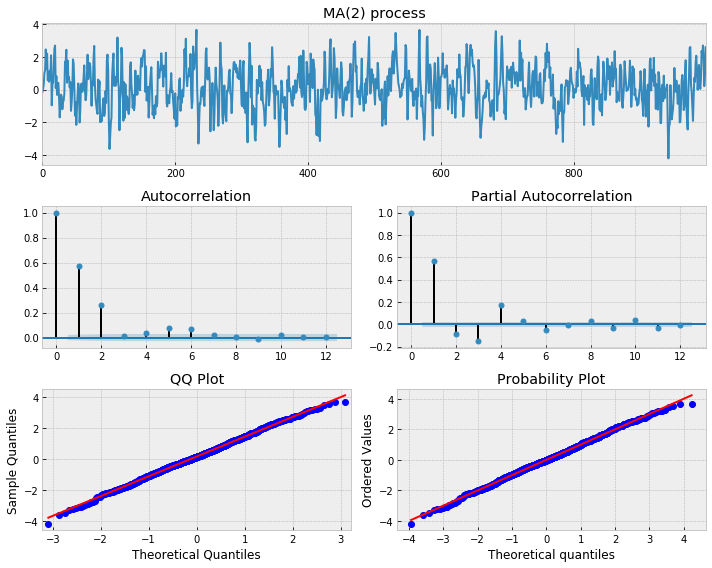

In [91]:
 #Simulate MA(2) process with betas 0.6, 0.4
n = int(1000)
alphas = np.array([0.])
betas = np.array([0.6, 0.4])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(ma3, lags=12,title="MA(2) process")

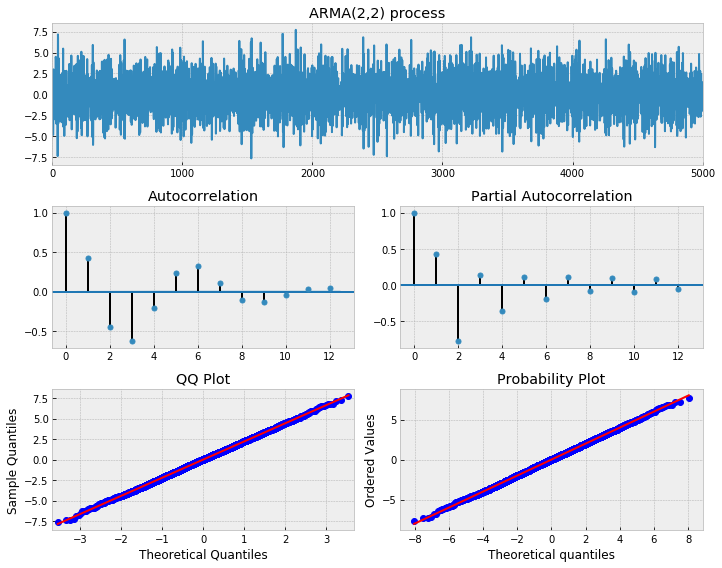

In [92]:
# Simulate an ARMA(2, 2) model with alphas=[0.5,-0.25] and betas=[0.5,-0.3]
max_lag = 12

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.8, -0.65])
betas = np.array([0.5, -0.7])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag,title="ARMA(2,2) process")

In [93]:
# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(arma22, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 15283.98038 | order: (4, 4)


In [94]:
#
# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(new_ts.values, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


aic: 472.99703 | order: (1, 1)


In [95]:
# adding the dates to the Time-series as index
ts=sales_train1.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts.head()

NameError: name 'sales' is not defined